## Homework

This repository contains a file `podcasts.json`. This is a json file with subset of Hebrew-language podcasts. Each line in this file is a separate json object with the following fields:

- `title`: the title of the podcast
- `description`: a short description of the podcast
- `url`: the URL of the podcast RSS feed
- `link`: the URL of the podcast website
- `createdOn`, `newestItemPubDate`: the date the podcast was created and the date of the newest episode (seconds since epoch)
- `updateFrequency`: the frequency of the podcast updates - the higher, the more frequent
- `age_months`: the age of the podcast in months at the date of the data collection
- `stale_days`: the number of days since the last episode was published
- `title_transliterated`: the title of the podcast, automatically transliterated to Latin characters
- `description_translated`: the description of the podcast, automatically translated to English

Create a Jupyter notebook that reads the `podcasts.json` file

1. Create a bipartite graph with two types of nodes: podcasts and keywords. The edges between podcasts and keywords
represent the presence of the keyword in the podcast description. The weight of the edge is the number
of times the keyword appears in the description.

- rank the keywords by the sum of the weights of the edges they are connected to.
What are the top-10 keywords?
- use sensible thresholds and create a podcast-podcast graph where the edges represent the
similarity between the podcasts based on the keywords. The weight of the edge is the similarity
between the podcasts. The graph should be small enough for you to be able to visualize it in the notebook. It should contain at least 100 podcasts. Save the graph to `podcast_keywords.graphml` file and the image to `podcast_keywords.png`.

2. Create a podcast-podcast graph where the edges represent the similarity between the podcasts based on the semantic similarity of the podcast descriptions. The weight of the edge is the similarity between the podcasts. The graph should be small enough for you to be able to visualize it in the notebook. It should contain at least 100 podcasts. Save the graph to `podcast_descriptions.graphml` file and the image to `podcast_descriptions.png`.


In [1]:
import networkx as nx
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
plt.rcParams['font.family'] = 'Arial Unicode MS'

In [2]:
dir_data = os.path.abspath("data")
fn = os.path.join(dir_data, "podcasts.json")
df = pd.read_json(fn, orient="records", lines=True)

In [3]:
from src.podcast_graph import build_podcast_and_keywords_graph, rank_keywords, PODCAST
podcasts_keywords_graph = build_podcast_and_keywords_graph(df = df)
ranked_keywords = rank_keywords(podcasts_keywords_graph)
print("Top 10 keywords:")
for rank, (keyword, weight) in enumerate(ranked_keywords[:10], start=1):
    print(f"{rank}. {keyword} (Weight: {weight})")

Top 10 keywords:
1. שחזור (Weight: 43)
2. mAyTS lymvd Anglyt (Weight: 30)
3. mAyTS lmydh TS'kyt (Weight: 29)
4. ltpl bqlynyqh SHlk (Weight: 26)
5. mAyTS lymvd rvsyt (Weight: 26)
6. mtbvnnym btvbnh (Weight: 25)
7. qsm hmvd`vt - TSmyKHh mtvk mSHbr v/Av trAvmh (Weight: 25)
8. pSHvt ndl"n (Weight: 25)
9. ndl"n zh ql (Weight: 25)
10. tqSHvrt Amytyt - hTSlKHh `m nSHym (Weight: 24)


In [4]:
from src.podcast_graph import get_connected_component_graph
podcasts_nodes = [
    n for n, d in podcasts_keywords_graph.nodes(data=True) if d["type"] == PODCAST
]

g_podcasts_by_keywords = nx.bipartite.weighted_projected_graph(
    podcasts_keywords_graph, podcasts_nodes
)

Graph with 187 nodes and 1565 edges


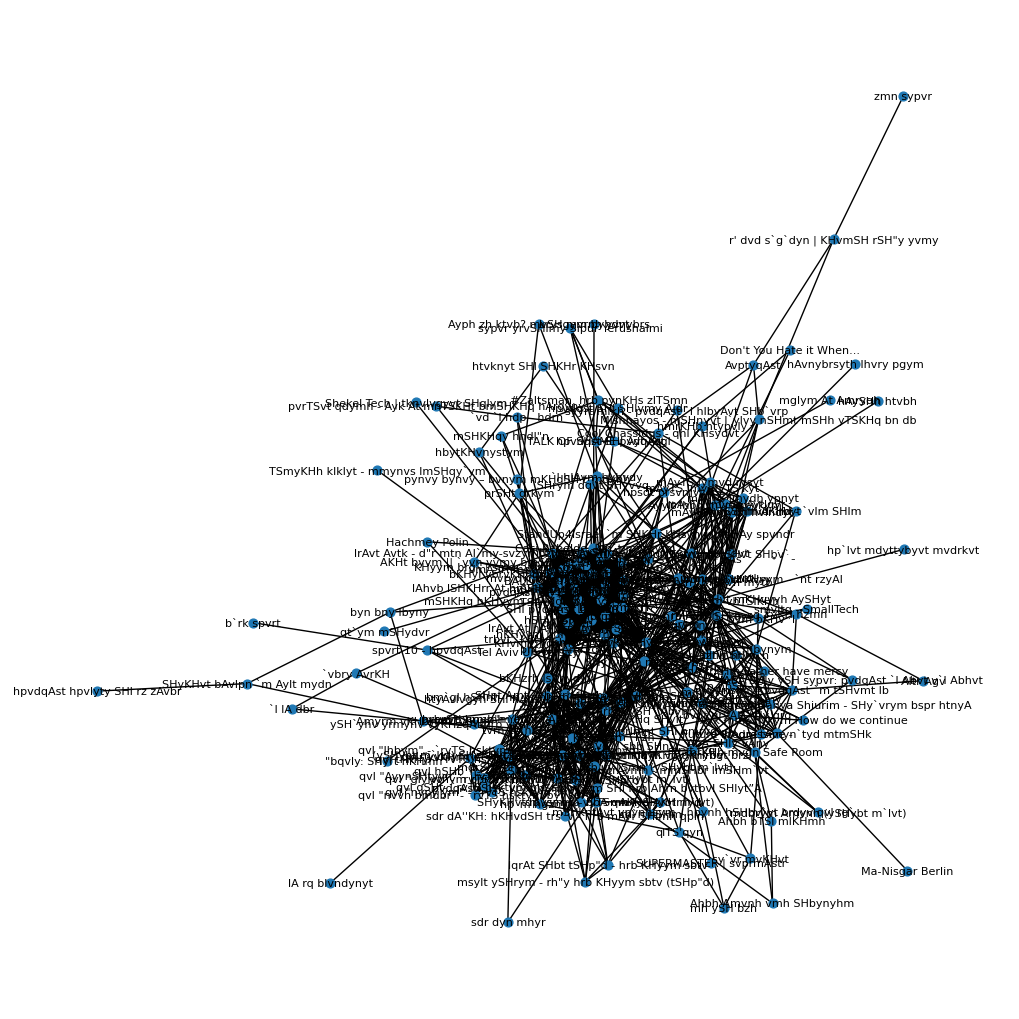

In [5]:
from src import tmdb_graph
podcasts_keywords_graph_trimmed = get_connected_component_graph(g_podcasts_by_keywords, size_min=100, size_max=500)

while(len(podcasts_keywords_graph_trimmed.nodes) > 200):
        podcasts_keywords_graph_trimmed.remove_node(list(podcasts_keywords_graph_trimmed.nodes)[0])
podcasts_keywords_graph_trimmed = tmdb_graph.remove_isolated_nodes(podcasts_keywords_graph_trimmed)        
nx.write_graphml(podcasts_keywords_graph_trimmed, "podcast_keywords.graphml")
print(podcasts_keywords_graph_trimmed)

layout = nx.spring_layout(podcasts_keywords_graph_trimmed, weight="weight")
plt.figure(figsize=(10, 10))
nx.draw(podcasts_keywords_graph_trimmed, layout, node_size=40, font_size=8, with_labels=True)
plt.savefig("podcast_keywords.png")


In [6]:
import spacy
from statsmodels.distributions.empirical_distribution import ECDF

try:
    nlp = spacy.load("en_core_web_md")
except:
    ! python -m spacy download en_core_web_md
    nlp = spacy.load("en_core_web_md")

In [7]:
podcasts_descriptions = [
    (m, d)
    for m, d in zip(df.title_transliterated.values, df.description_translated.values)
]

In [8]:
docs = {
    podcast: nlp(str(description))
    for podcast, description in tqdm(
        podcasts_descriptions,
        desc="Processing descriptions",
        total=len(podcasts_descriptions),
    )
}

Processing descriptions:   0%|          | 0/1557 [00:00<?, ?it/s]

In [9]:
# Calculate similarity
similarity = []
for mi in tqdm(range(len(podcasts_descriptions)), desc="Calculating similarities"):
    m1 = podcasts_descriptions[mi][0]
    doc1 = docs[m1]
    for mj in range(mi + 1, len(podcasts_descriptions)):
        m2 = podcasts_descriptions[mj][0]
        doc2 = docs[m2]
        similarity.append((m1, m2, doc1.similarity(doc2)))

Calculating similarities:   0%|          | 0/1557 [00:00<?, ?it/s]

C:\Users\itama\AppData\Local\Temp\ipykernel_13352\619494577.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity.append((m1, m2, doc1.similarity(doc2)))


There are 104938 pairs with similarity above 0.93 (8.66%)
Graph with 1138 nodes and 102436 edges


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

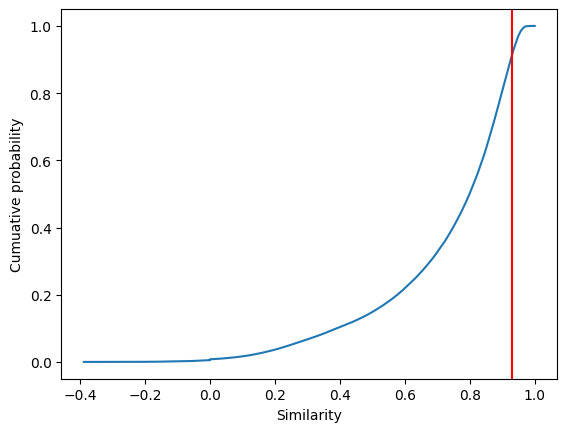

In [10]:
from src import tmdb_graph 
ecdf = ECDF([s for _, _, s in similarity])
threshold = 0.93
plt.plot(ecdf.x, ecdf.y)
plt.axvline(threshold, color="red")
plt.xlabel("Similarity")
plt.ylabel("Cumuative probability")
n_above = sum([s > threshold for _, _, s in similarity])
p_above = n_above / len(similarity) * 100
print(
    f"There are {n_above} pairs with similarity above {threshold:.2f} ({p_above:.2f}%)"
)
g_similar_podcasts = nx.Graph()
g_similar_podcasts.add_weighted_edges_from(
    [
        (m1, m2, (s + 1e-3 - threshold) / (1 - threshold))
        for m1, m2, s in similarity
        if s > threshold
    ]
)
g_similar_podcasts = tmdb_graph.remove_isolated_nodes(g_similar_podcasts)
g_similar_podcasts = tmdb_graph.get_largest_connected_component_graph(g_similar_podcasts)
print(g_similar_podcasts)
nx.write_graphml(g_similar_podcasts, "full_podcast_descriptions.graphml")

Graph with 149 nodes and 1165 edges


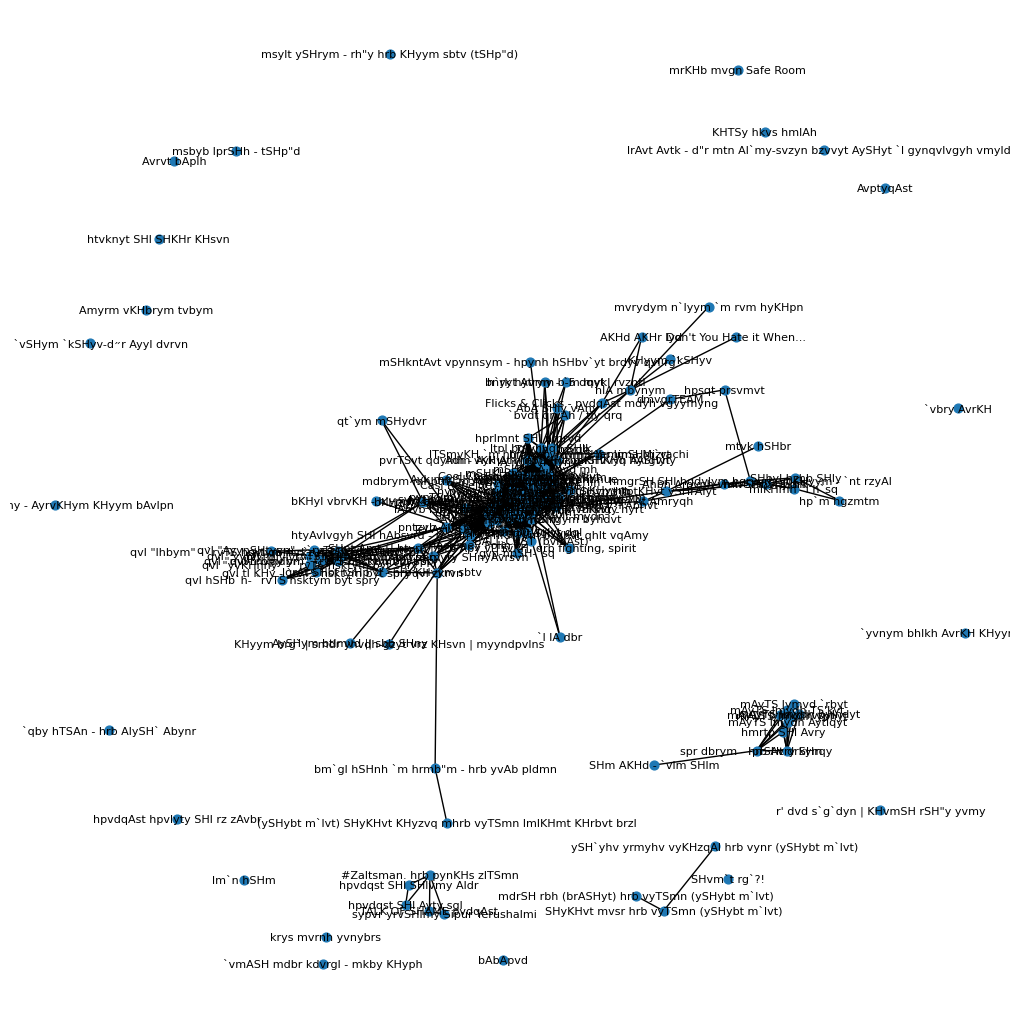

In [11]:
g_similar_podcasts_trimmed = g_similar_podcasts.copy()
for node in list(g_similar_podcasts_trimmed.nodes):
    if node not in podcasts_keywords_graph_trimmed.nodes:
        g_similar_podcasts_trimmed.remove_node(node)
        
nx.write_graphml(g_similar_podcasts_trimmed, "podcast_descriptions.graphml")
print(g_similar_podcasts_trimmed)

layout = nx.spring_layout(g_similar_podcasts_trimmed, weight="weight")
plt.figure(figsize=(10, 10))
plt.rcParams['font.family'] = 'Arial Unicode MS'
nx.draw(g_similar_podcasts_trimmed, layout, node_size=40, font_size=8, with_labels=True)
plt.savefig("podcast_descriptions.png")
